## Data Preprocessing:

In [97]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [98]:
df = pd.read_csv("GOOG.csv")
df.head()
df['Date'] = pd.to_datetime(df['Date'])

In [99]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [100]:
df.duplicated().sum()

np.int64(0)

In [101]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,4858,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4.858000e+03
mean,2014-04-12 02:30:17.044051200,41.477174,41.917059,41.055491,41.494404,41.494404,1.189152e+08
min,2004-08-19 00:00:00,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,2009-06-16 06:00:00,12.846597,12.954195,12.712414,12.834642,12.834642,2.854912e+07
50%,2014-04-12 12:00:00,26.499958,26.728268,26.289323,26.537501,26.537501,6.168836e+07
75%,2019-02-07 18:00:00,57.367250,58.028500,56.962251,57.611249,57.611249,1.467329e+08
max,2023-12-05 00:00:00,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09
std,NaN,38.590695,39.031758,38.193016,38.618107,38.618107,1.512424e+08


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4858 non-null   datetime64[ns]
 1   Open       4858 non-null   float64       
 2   High       4858 non-null   float64       
 3   Low        4858 non-null   float64       
 4   Close      4858 non-null   float64       
 5   Adj Close  4858 non-null   float64       
 6   Volume     4858 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 265.8 KB


In [103]:
df.count()

Date         4858
Open         4858
High         4858
Low          4858
Close        4858
Adj Close    4858
Volume       4858
dtype: int64

Text(0, 0.5, 'Frequency')

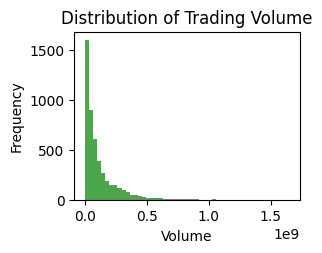

In [104]:
plt.subplot(2, 2, 2)
plt.hist(df['Volume'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

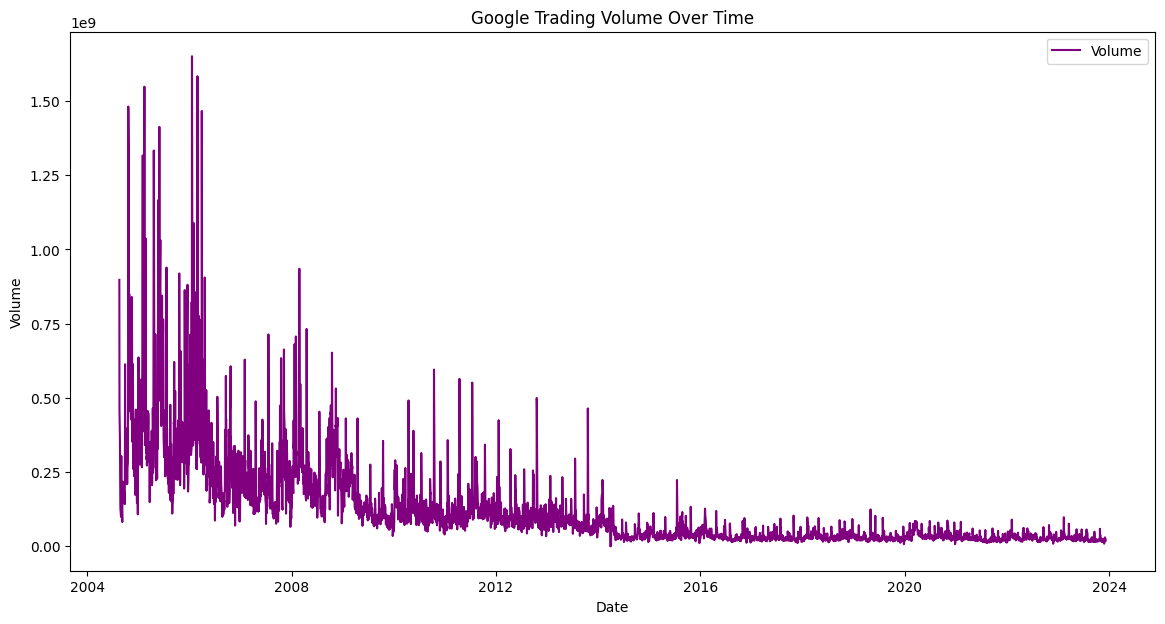

In [105]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Volume'], label='Volume', color='purple')
plt.title('Google Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


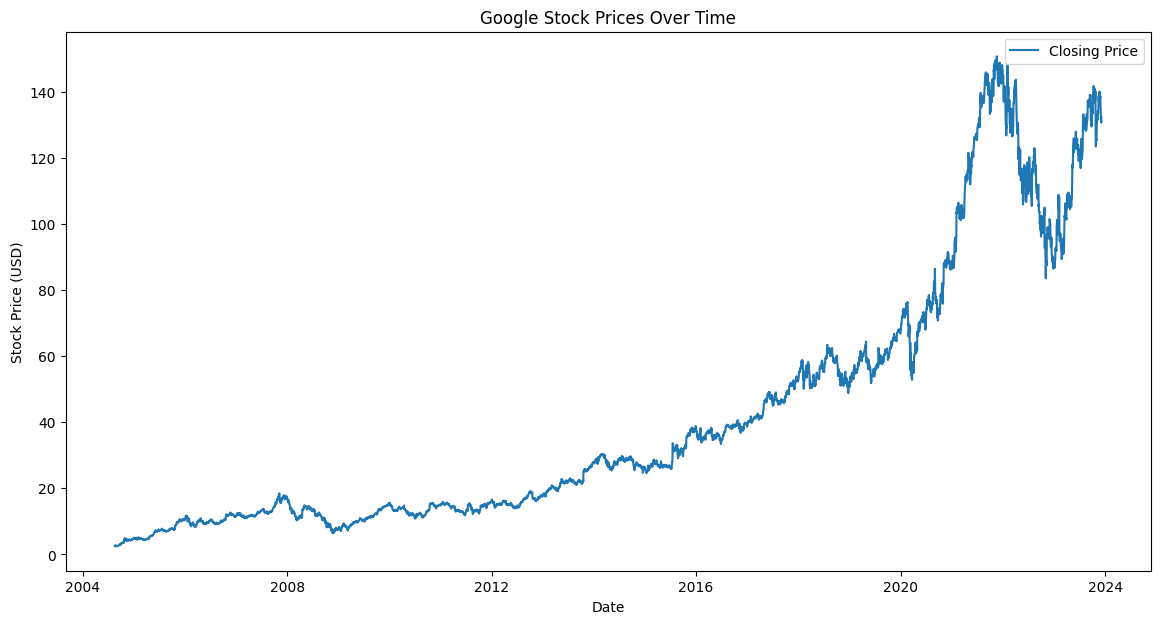

In [106]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Google Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

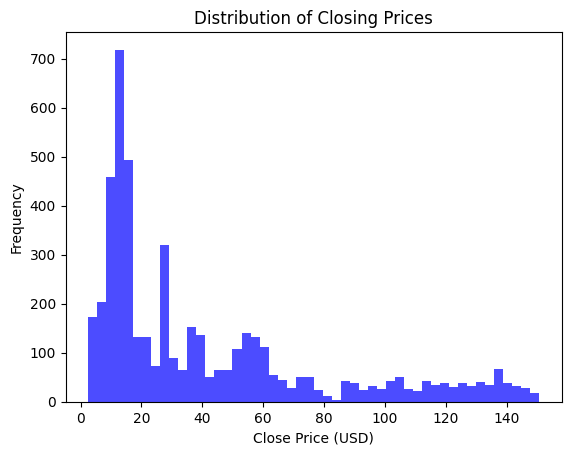

In [107]:
plt.hist(df['Close'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price (USD)')
plt.ylabel('Frequency')
plt.show()

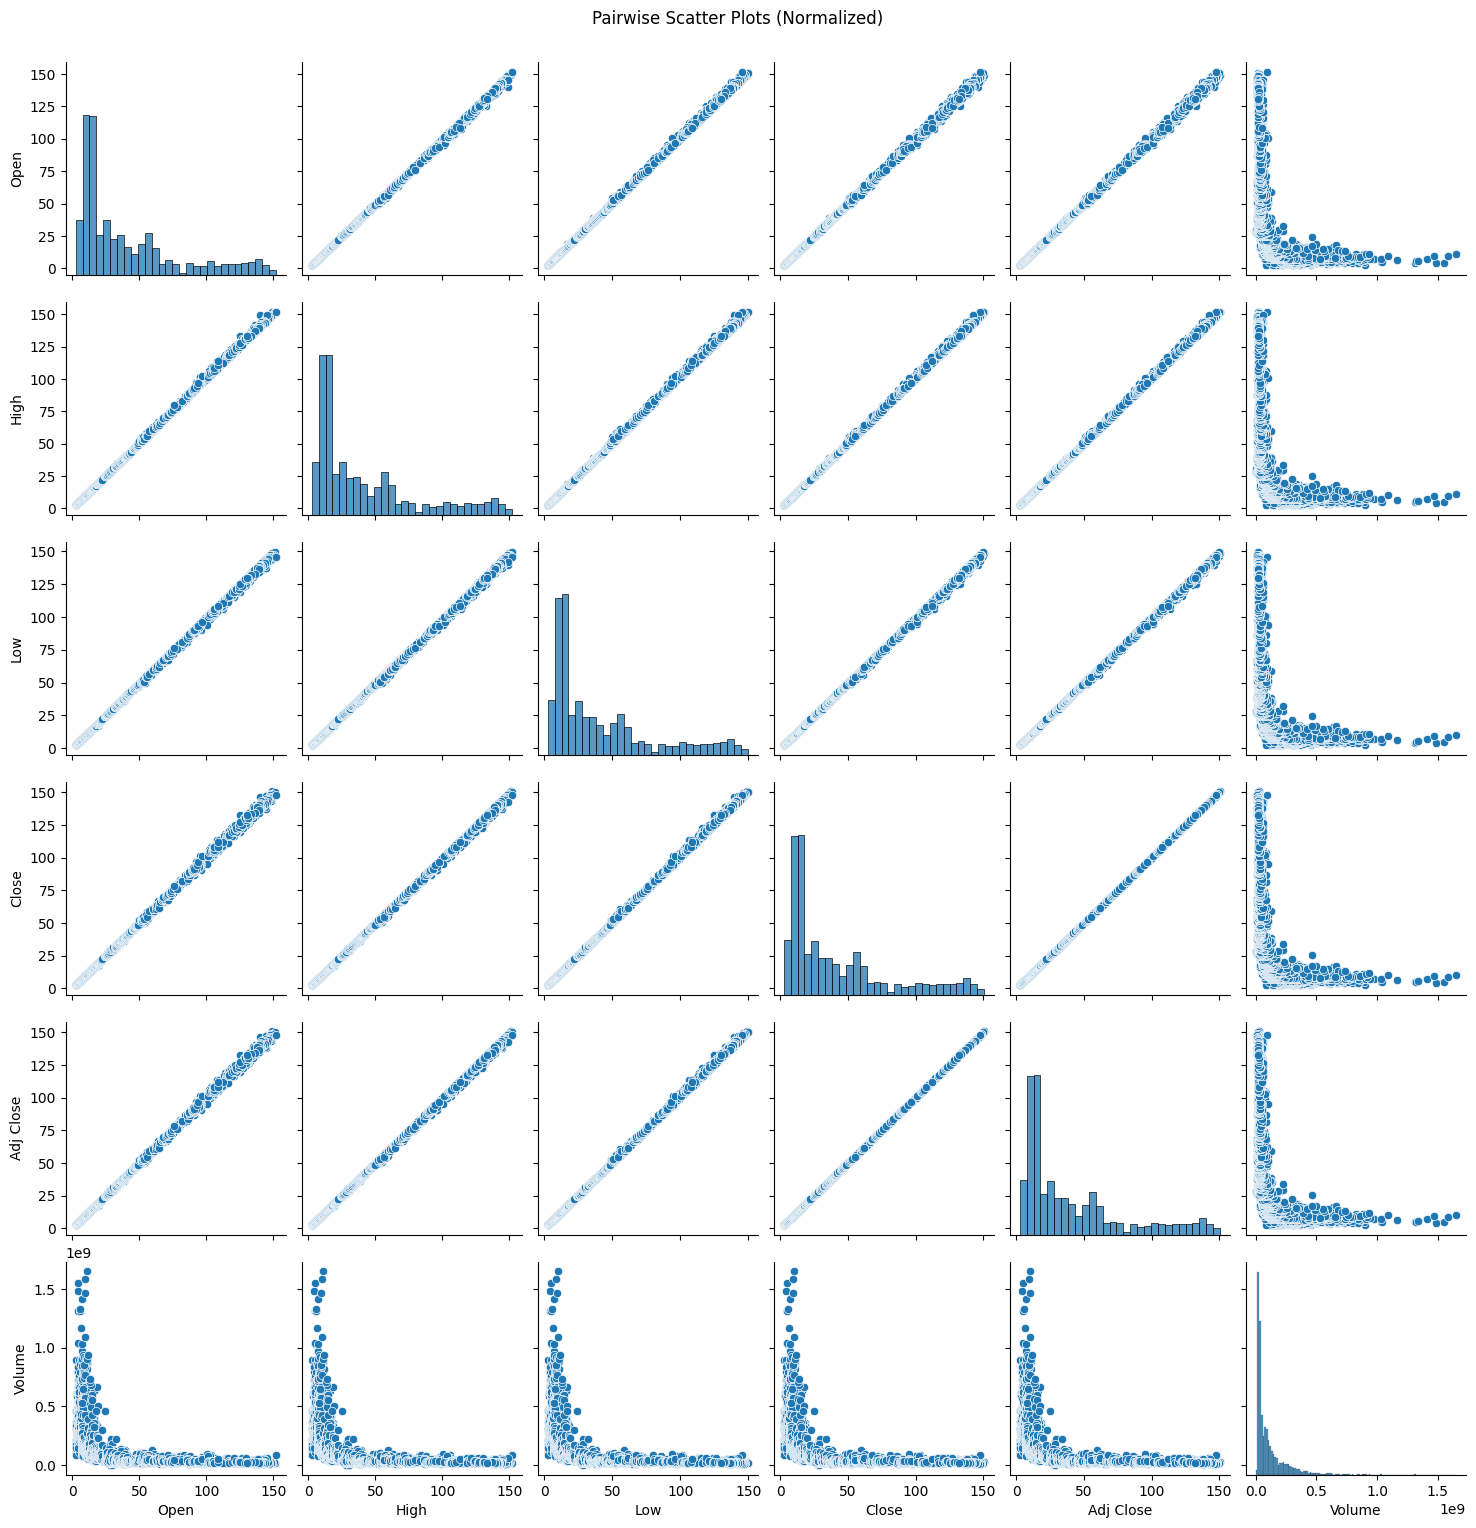

In [108]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
plt.suptitle('Pairwise Scatter Plots (Normalized)', y=1.02)
plt.show()

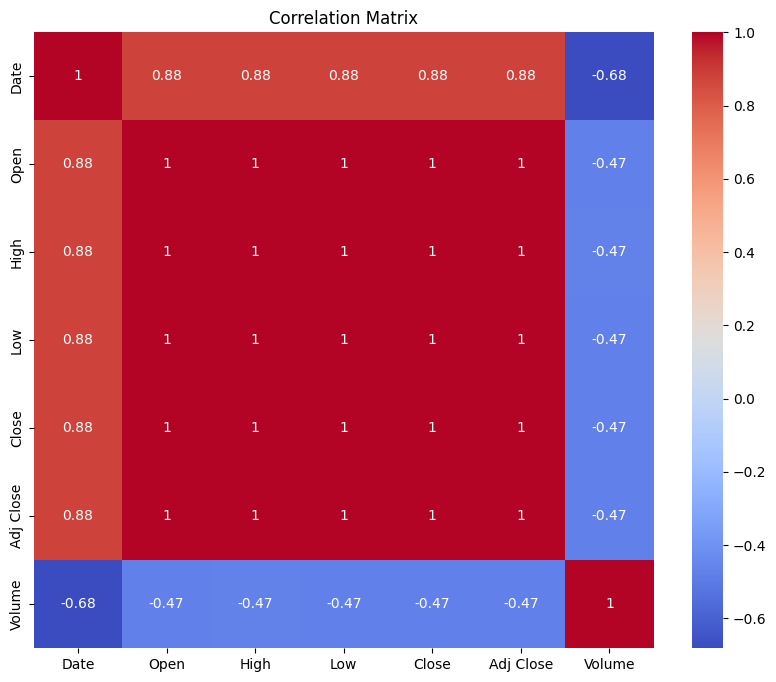

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

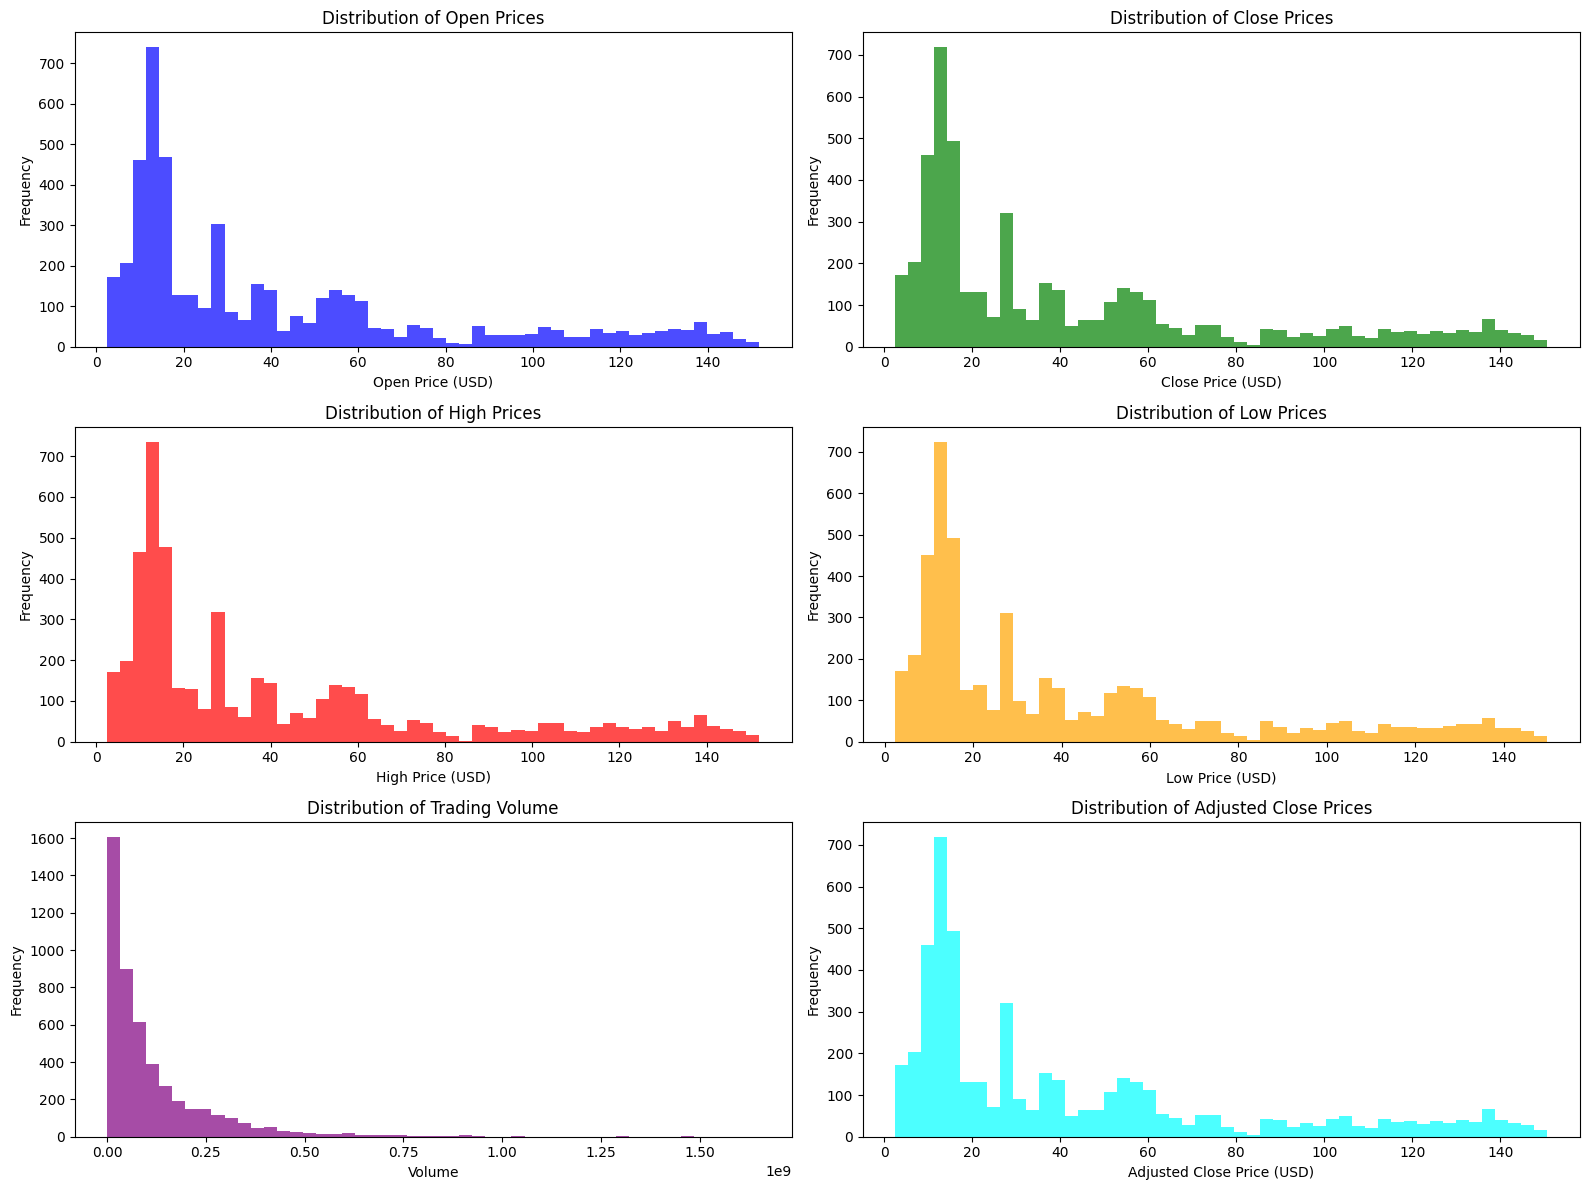

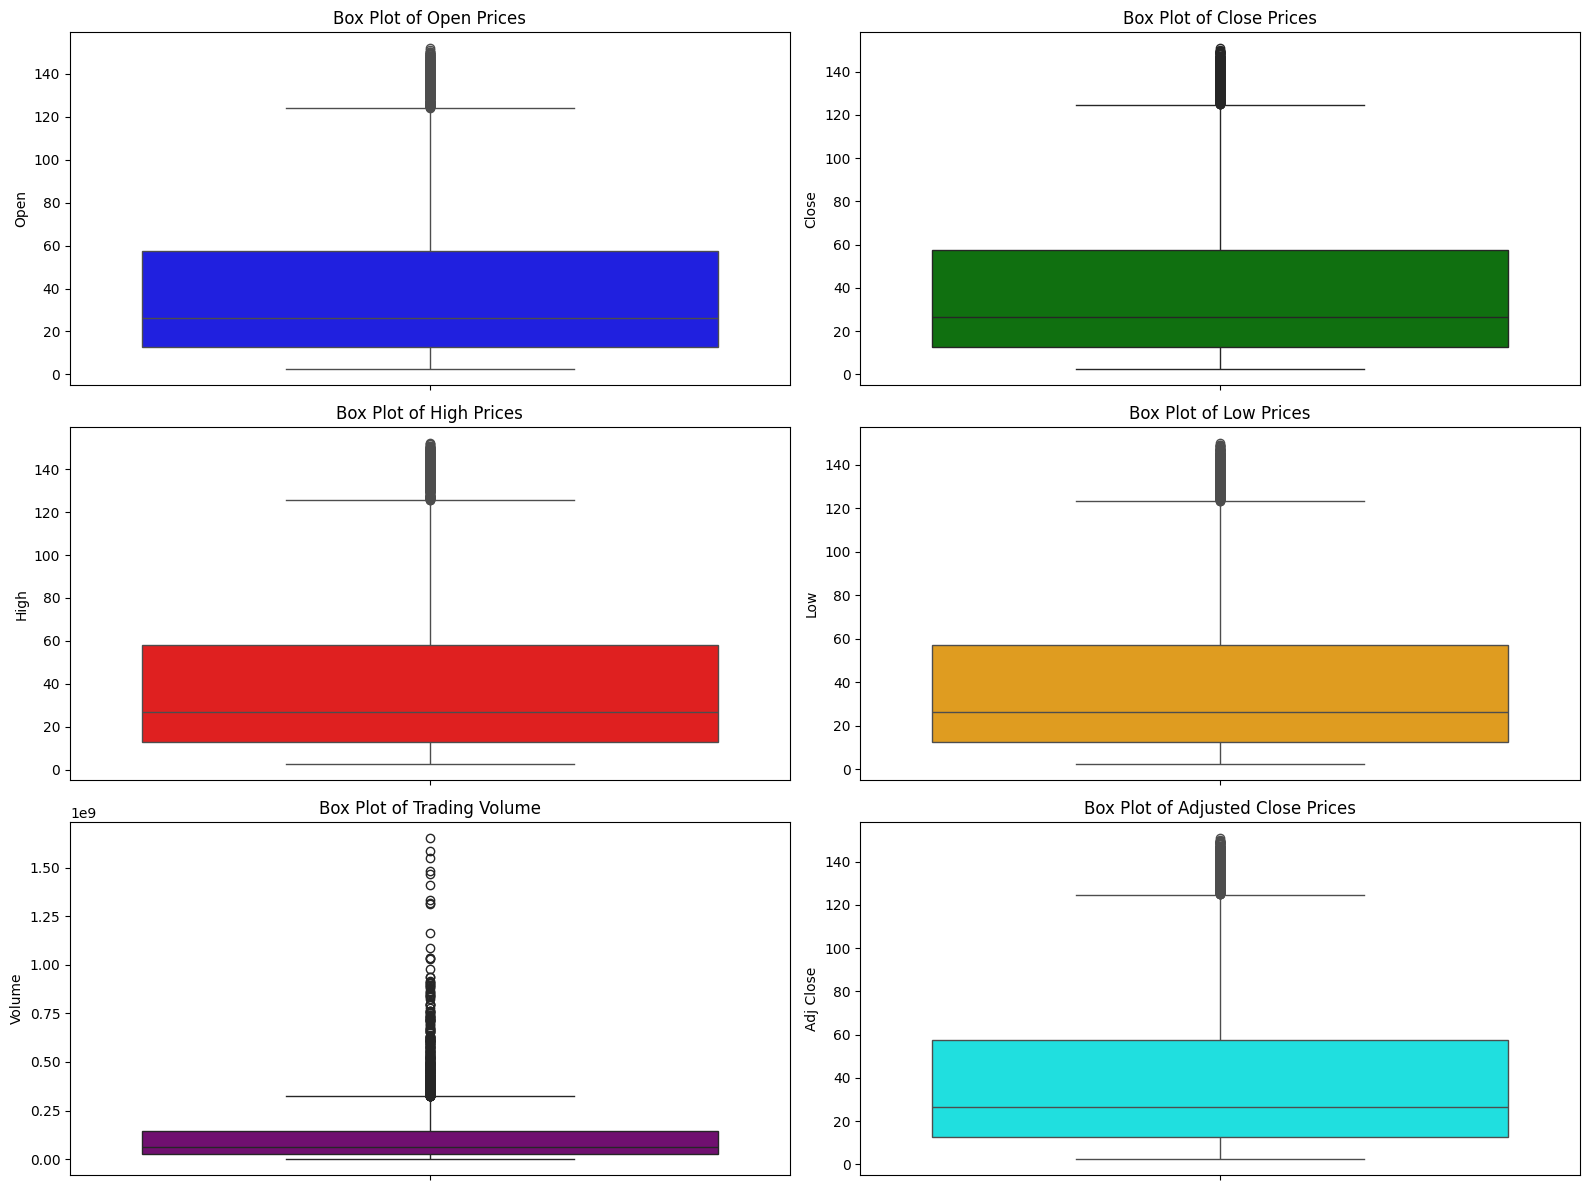

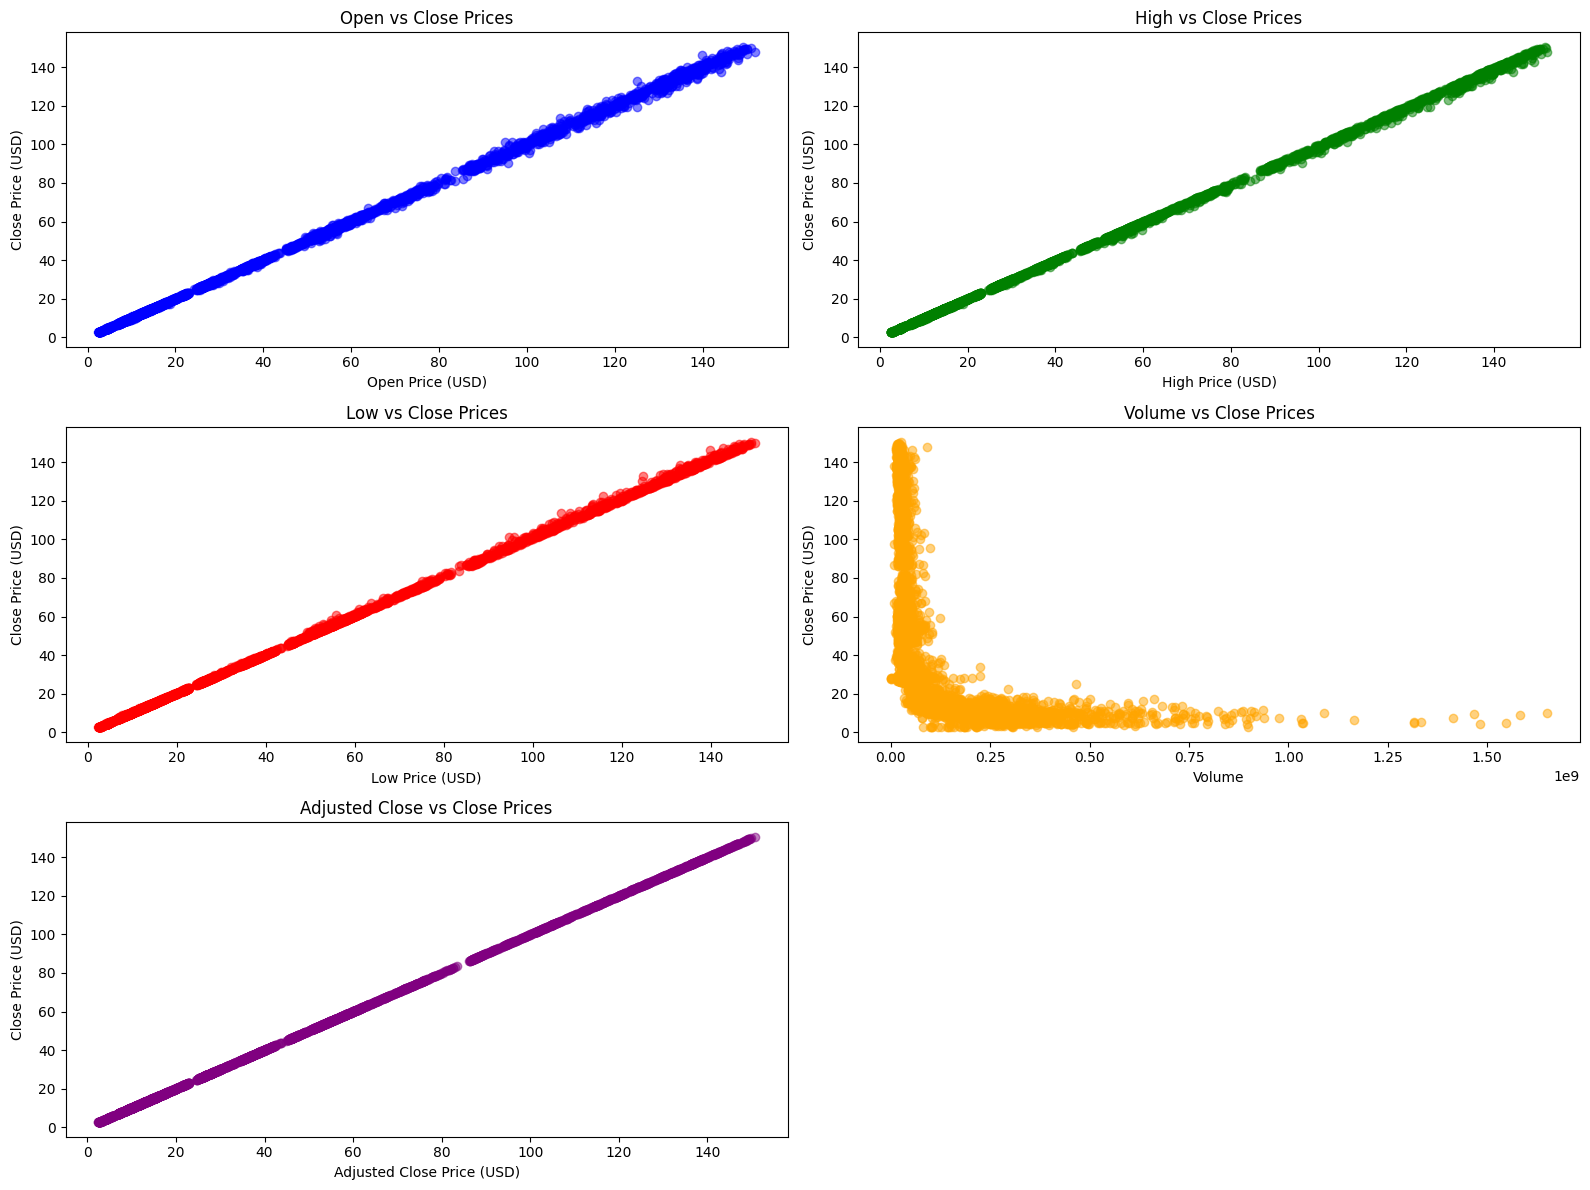

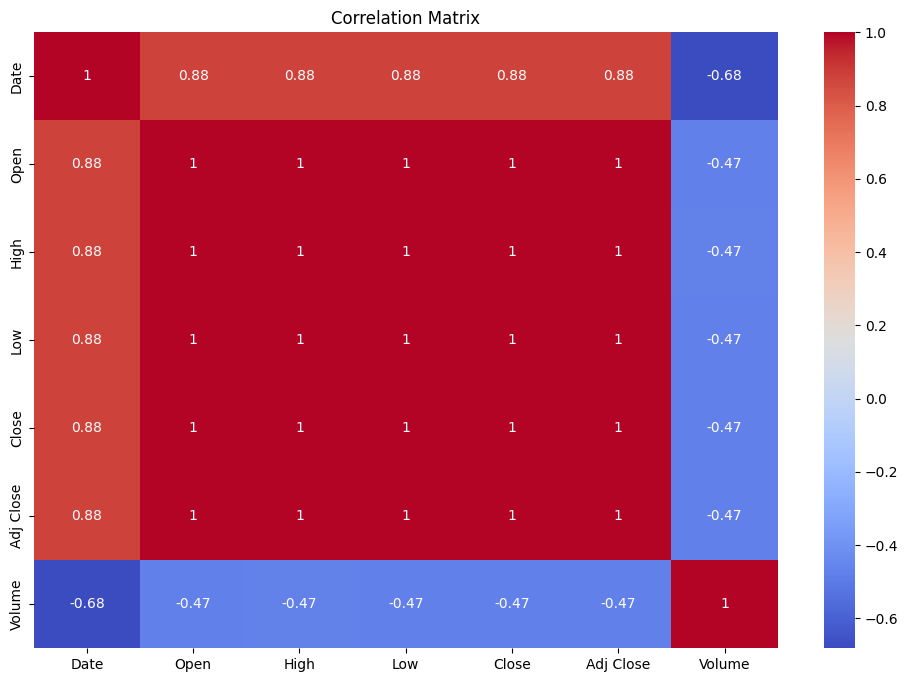

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of variables using histograms
plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
plt.hist(df['Open'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Open Prices')
plt.xlabel('Open Price (USD)')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
plt.hist(df['Close'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price (USD)')
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
plt.hist(df['High'], bins=50, color='red', alpha=0.7)
plt.title('Distribution of High Prices')
plt.xlabel('High Price (USD)')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
plt.hist(df['Low'], bins=50, color='orange', alpha=0.7)
plt.title('Distribution of Low Prices')
plt.xlabel('Low Price (USD)')
plt.ylabel('Frequency')

plt.subplot(3, 2, 5)
plt.hist(df['Volume'], bins=50, color='purple', alpha=0.7)
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.subplot(3, 2, 6)
plt.hist(df['Adj Close'], bins=50, color='cyan', alpha=0.7)
plt.title('Distribution of Adjusted Close Prices')
plt.xlabel('Adjusted Close Price (USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box plots to visualize the spread and identify outliers
plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
sns.boxplot(y=df['Open'], color='blue')
plt.title('Box Plot of Open Prices')

plt.subplot(3, 2, 2)
sns.boxplot(y=df['Close'], color='green')
plt.title('Box Plot of Close Prices')

plt.subplot(3, 2, 3)
sns.boxplot(y=df['High'], color='red')
plt.title('Box Plot of High Prices')

plt.subplot(3, 2, 4)
sns.boxplot(y=df['Low'], color='orange')
plt.title('Box Plot of Low Prices')

plt.subplot(3, 2, 5)
sns.boxplot(y=df['Volume'], color='purple')
plt.title('Box Plot of Trading Volume')

plt.subplot(3, 2, 6)
sns.boxplot(y=df['Adj Close'], color='cyan')
plt.title('Box Plot of Adjusted Close Prices')

plt.tight_layout()
plt.show()

# Scatter plots to explore relationships between variables
plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
plt.scatter(df['Open'], df['Close'], alpha=0.5, color='blue')
plt.title('Open vs Close Prices')
plt.xlabel('Open Price (USD)')
plt.ylabel('Close Price (USD)')

plt.subplot(3, 2, 2)
plt.scatter(df['High'], df['Close'], alpha=0.5, color='green')
plt.title('High vs Close Prices')
plt.xlabel('High Price (USD)')
plt.ylabel('Close Price (USD)')

plt.subplot(3, 2, 3)
plt.scatter(df['Low'], df['Close'], alpha=0.5, color='red')
plt.title('Low vs Close Prices')
plt.xlabel('Low Price (USD)')
plt.ylabel('Close Price (USD)')

plt.subplot(3, 2, 4)
plt.scatter(df['Volume'], df['Close'], alpha=0.5, color='orange')
plt.title('Volume vs Close Prices')
plt.xlabel('Volume')
plt.ylabel('Close Price (USD)')

plt.subplot(3, 2, 5)
plt.scatter(df['Adj Close'], df['Close'], alpha=0.5, color='purple')
plt.title('Adjusted Close vs Close Prices')
plt.xlabel('Adjusted Close Price (USD)')
plt.ylabel('Close Price (USD)')

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [111]:


scaler = MinMaxScaler(feature_range=(0,1))

numerical_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Summary statistics after normalization:")
print(df.describe())


Summary statistics after normalization:
                                Date         Open         High          Low  \
count                           4858  4858.000000  4858.000000  4858.000000   
mean   2014-04-12 02:30:17.044051200     0.261101     0.263316     0.262143   
min              2004-08-19 00:00:00     0.000000     0.000000     0.000000   
25%              2009-06-16 06:00:00     0.069455     0.069670     0.069983   
50%              2014-04-12 12:00:00     0.160847     0.161763     0.162032   
75%              2019-02-07 18:00:00     0.367465     0.371037     0.369987   
max              2023-12-05 00:00:00     1.000000     1.000000     1.000000   
std                              NaN     0.258317     0.260967     0.258940   

             Close    Adj Close       Volume  
count  4858.000000  4858.000000  4858.000000  
mean      0.263149     0.263149     0.071944  
min       0.000000     0.000000     0.000000  
25%       0.069787     0.069787     0.017199  
50%       0.1

In [112]:
X = df.drop(columns=['Close', 'Date'])  # Features
y = df['Close']  # Target variable


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    
    # Print results
    print(f"{name}:")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  R-squared (R2): {r2}")
    print()

NameError: name 'y_true' is not defined

In [ ]:
import numpy as np

class CustomLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y):
        # Add bias term
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Compute parameters using closed-form solution (normal equation)
        theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)
        
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]
    
    def predict(self, X):
        # Add bias term
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        
        return X_bias.dot(np.concatenate([[self.intercept_], self.coef_]))

#Example usage:
model = CustomLinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)
    
print(f"Custom Linear Regression:")
print(f"  Mean Squared Error (MSE): {mse}")
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Root Mean Squared Error (RMSE): {rmse}")
print(f"  R-squared (R2): {r2}")


Custom Linear Regression:
  Mean Squared Error (MSE): 3.47786159218028e-24
  Mean Absolute Error (MAE): 1.812496975396191e-12


In [ ]:
import numpy as np

class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None
    
    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)
    
    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree) for x in X])
    
    def _build_tree(self, X, y, depth):
        # Base case: stop recursion if max depth is reached or node is pure
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return np.mean(y)
        
        # Find best split (for simplicity, use mean of features as split)
        feature_idx = np.argmax(np.var(X, axis=0))  # Example: split on feature with highest variance
        split_value = np.mean(X[:, feature_idx])
        
        # Split data
        left_mask = X[:, feature_idx] < split_value
        X_left, y_left = X[left_mask], y[left_mask]
        X_right, y_right = X[~left_mask], y[~left_mask]
        
        # Recursively build tree
        left_tree = self._build_tree(X_left, y_left, depth + 1)
        right_tree = self._build_tree(X_right, y_right, depth + 1)
        
        return {'feature_idx': feature_idx,
                'split_value': split_value,
                'left_tree': left_tree,
                'right_tree': right_tree}
    
    def _predict_tree(self, x, tree):
        if isinstance(tree, (float, np.float64)):  # leaf node
            return tree
        if x[tree['feature_idx']] < tree['split_value']:
            return self._predict_tree(x, tree['left_tree'])
        else:
            return self._predict_tree(x, tree['right_tree'])

#Example usage:
model = CustomDecisionTreeRegressor(max_depth=5)
model.fit(X_train.values, y_train.values)
y_pred = model.predict(X_test.values)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)    
print(f"Custom Decision Tree Regression:")
print(f"  Mean Squared Error (MSE): {mse}")
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Root Mean Squared Error (RMSE): {rmse}")
print(f"  R-squared (R2): {r2}")



Custom Decision Tree Regression:
  Mean Squared Error (MSE): 0.0002539335727591063
  Mean Absolute Error (MAE): 0.01205761257145198


In [ ]:
class CustomRandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.estimators = []
        
    def fit(self, X, y):
        self.estimators = []
        X_np = X.values if isinstance(X, pd.DataFrame) else X  # Ensure X is a NumPy array
        y_np = y.values if isinstance(y, pd.Series) else y  # Ensure y is a NumPy array
        
        for _ in range(self.n_estimators):
            idx = np.random.choice(len(X_np), size=len(X_np), replace=True)
            X_bootstrapped = X_np[idx]
            y_bootstrapped = y_np[idx]
            
            tree = CustomDecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_bootstrapped, y_bootstrapped)
            self.estimators.append(tree)
    
    def predict(self, X):
        X_np = X.values if isinstance(X, pd.DataFrame) else X  # Ensure X is a NumPy array
        predictions = np.zeros(len(X_np))
        for tree in self.estimators:
            predictions += tree.predict(X_np)
        return predictions / self.n_estimators

# Example usage:
model = CustomRandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)
print("Custom Random Forest Regression:")
print(f"  Mean Squared Error (MSE): {mse}")
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Root Mean Squared Error (RMSE): {rmse}")
print(f"  R-squared (R2): {r2}")

Custom Random Forest Regression:
  Mean Squared Error (MSE): 0.0001596768716624359
  Mean Absolute Error (MAE): 0.008502962007655646
